Given an image, this notebook will get patches from the image and write it to file to be fed into a classifier. 

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os 
import sys 
import numpy as np
from pathlib import Path

In [4]:
sys.path.append('/Users/christinebalili/Desktop/coralai/src/')
sys.path.append('/Users/christinebalili/Desktop/coralai/src/patcher')
sys.path.append('/Users/christinebalili/Desktop/coralai/src/inference')

In [5]:
from fastai.vision import *

In [6]:
from patcher import patches
from inference import helper

In [7]:
os.chdir('../')
os.getcwd()

'/Users/christinebalili/Desktop/coralai'

### Given an image, we extract equally size patches from it. 
This approach is very crude and will most likley not work since some items of interest will be cropped. ``helper.generate_patches_from_img`` returns a dictionary where the keys represent the position of the patch in the image and the values are the corresponding images.

In [9]:
test_image = patches.get_image("benthoz_images/PR_20090326_013856_939_LC16.tif")
test_img_patches = helper.generate_patches_from_img(test_image)

/anaconda3/envs/coralai/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/envs/coralai/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [11]:
test_img_patches[(0, 0)].shape

(128, 128, 3)

## Show original image

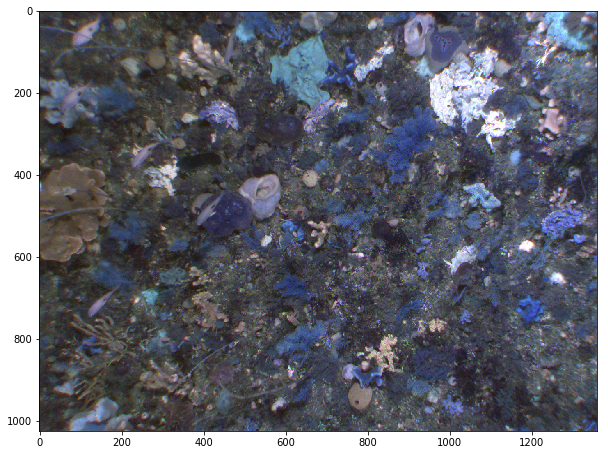

In [61]:
plt.figure(figsize=(10, 15))
plt.imshow(test_image)

## Show patches from the image

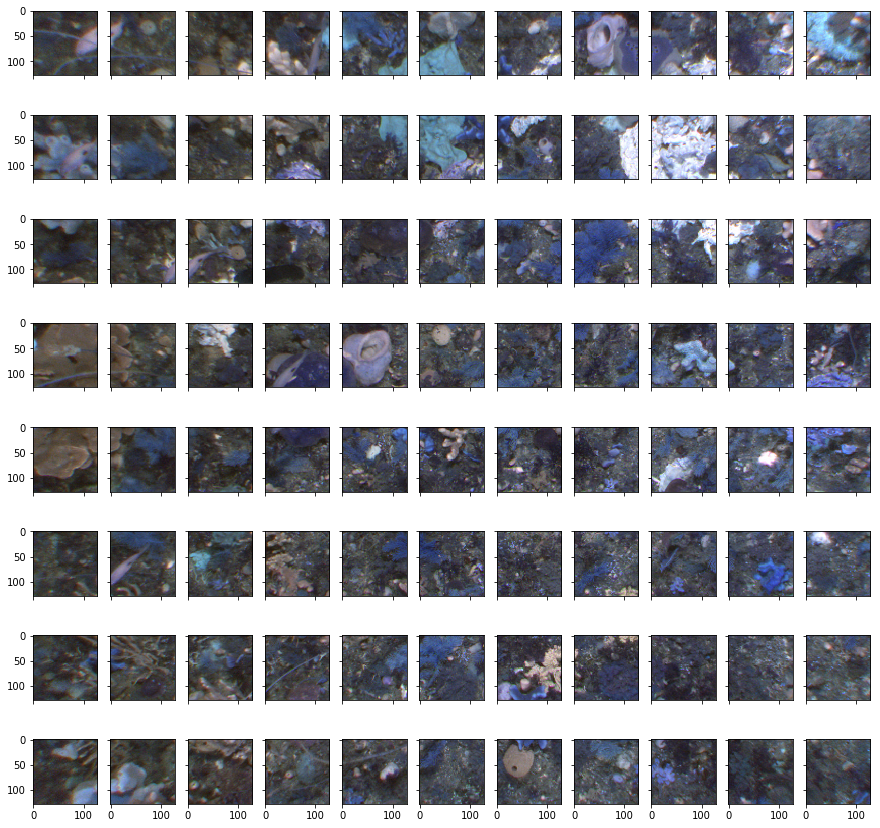

In [13]:
fig, ax = plt.subplots(8, 11, figsize = (15, 15), sharex='col', sharey='row')

for (r, c) in test_img_patches:
    ax[r, c].imshow(test_img_patches[r, c])

## Todo: Train a model that can identify points of interest in an image and draw a bounding box around them 